<h1>About Dataset

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.

<h1> Goals : 


> Melakukan EDA (exploaratory Data Analysis) untuk mendapatkan insight dari data.



Import Libraries

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import sort_dataframeby_monthorweek as sd

In [ ]:
matplotlib.__version__
!pip install matplotlib==3.5.1
plt.style.use('fivethirtyeight')

Load Dataset

In [3]:
supermarket='https://raw.githubusercontent.com/RakaMurdiarta\
/Supermarket-Sales-Kaggle/main/supermarket_sales%20-%20Sheet1.csv'
df=pd.read_csv(supermarket)


<h4> Examine Data

In [4]:
# Gross margin = net profit margin
# Gross income = net profit (laba bersih)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,26.494628,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,245.885335,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,234.176510,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,0.000000,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580,4.000000,5.500000,7.000000,8.500000,10.000000


In [8]:
df.describe(include='object').T

,count,unique,top,freq
Invoice ID,1000,1000,750-67-8428,1
Branch,1000,3,A,340
City,1000,3,Yangon,340
Customer type,1000,2,Member,501
Gender,1000,2,Female,501
Product line,1000,6,Fashion accessories,178
Date,1000,89,2/7/2019,20
Time,1000,506,19:48,7
Payment,1000,3,Ewallet,345


<h1>Data Cleaning

In [9]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [10]:
df.duplicated().any()

False

<h1> Data Preprocessing

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [12]:
df['Date']=pd.to_datetime(df.Date,format="%m/%d/%Y")

<h1> Data Manipulation

In [13]:
df['Year']=df.Date.dt.year
df['Month']=df.Date.dt.month_name()
df['Day']=df.Date.dt.day
df['Day_name']=df.Date.dt.day_name()

In [14]:
df['Hour']=df.Time.str.split(':',expand=True)[0]
df['Minute']=df.Time.str.split(':',expand=True)[1]

In [15]:
df.sample()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,cogs,gross margin percentage,gross income,Rating,Year,Month,Day,Day_name,Hour,Minute
961,324-92-3863,A,Yangon,Member,Male,Electronic accessories,20.89,2,2.089,43.869,...,41.78,4.761905,2.089,9.8,2019,February,5,Tuesday,18,45


<h1> Data Preparing

In [16]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Year', 'Month', 'Day', 'Day_name', 'Hour', 'Minute'],
      dtype='object')

In [17]:
object_=['Branch', 'City', 'Customer type', 'Gender','Payment','Product line']
digit_=['Unit price','Quantity','Tax 5%','Rating','Total']

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [19]:
df[['Hour','Minute']]=df[['Hour','Minute']].astype(int)

In [20]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,cogs,gross margin percentage,gross income,Rating,Year,Month,Day,Day_name,Hour,Minute
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,522.83,4.761905,26.1415,9.1,2019,January,5,Saturday,13,8
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,76.40,4.761905,3.8200,9.6,2019,March,8,Friday,10,29
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,324.31,4.761905,16.2155,7.4,2019,March,3,Sunday,13,23
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,465.76,4.761905,23.2880,8.4,2019,January,27,Sunday,20,33
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,604.17,4.761905,30.2085,5.3,2019,February,8,Friday,10,37


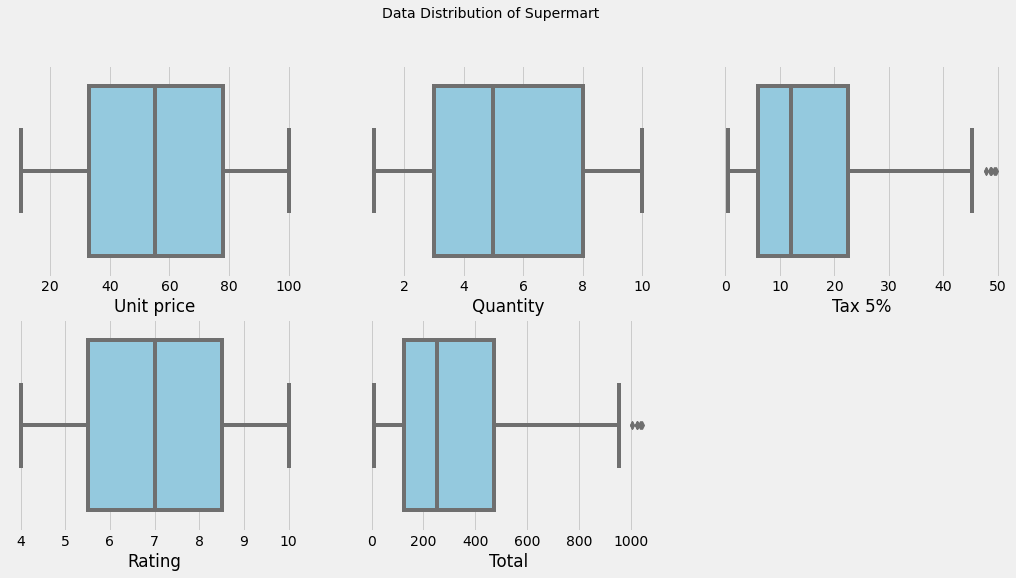

In [21]:
#visualisi
plt.figure(figsize=(16,8))

for i , d in enumerate(digit_,1):
  plt.subplot(2,3,i)
  ax=sns.boxplot(data=df,x=d,color='skyblue')
  
plt.suptitle('Data Distribution of Supermart',size=14)
plt.show()

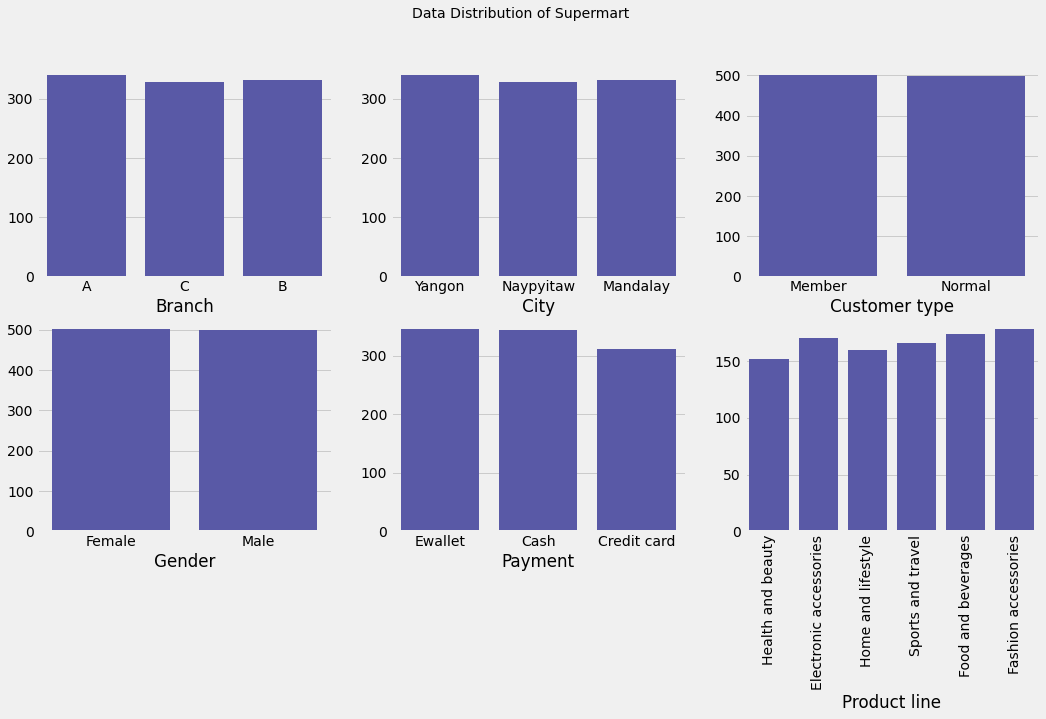

In [22]:
#visualisi
plt.figure(figsize=(16,8))

for i , o in enumerate(object_,1):
  plt.subplot(2,3,i)
  ax=sns.countplot(data=df,x=o,color='blue',saturation=0.3,dodge=False)
  plt.ylabel(None)
plt.xticks(rotation=90)
plt.suptitle('Data Distribution of Supermart',size=14)
plt.show()

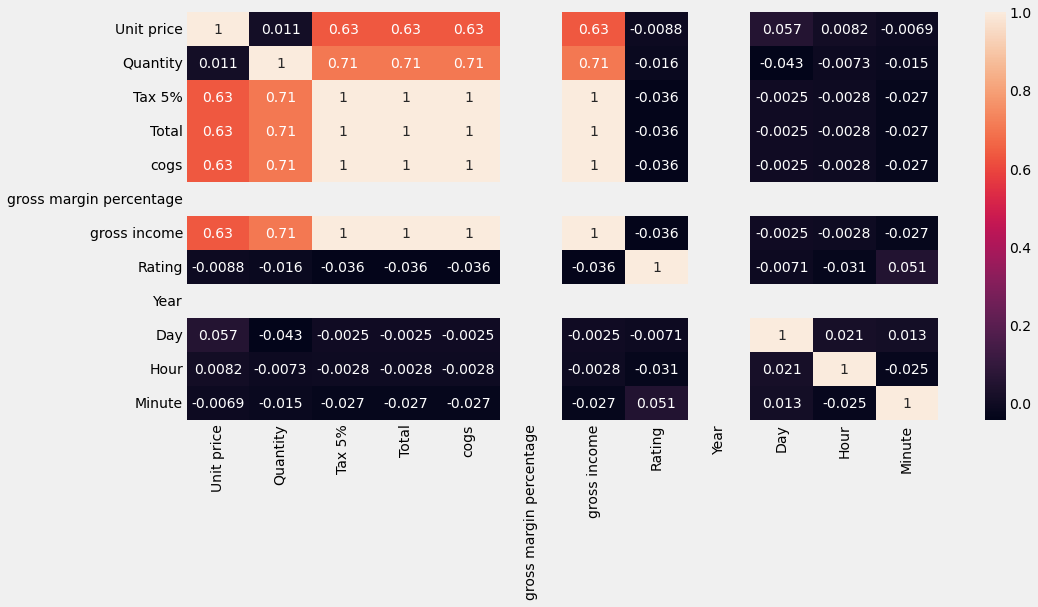

In [23]:
#Corelation
plt.figure(figsize=(15,7))
ax=sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

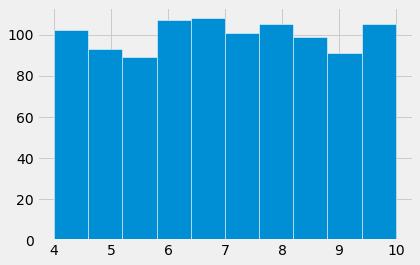

In [87]:
df.Rating.hist(ec='white')

<AxesSubplot:xlabel='Total', ylabel='gross income'>

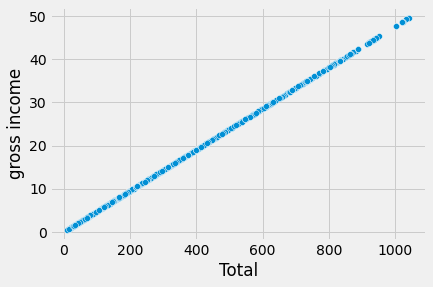

In [148]:
sns.scatterplot(data=df, x='Total',y='gross income')

<h1>Exploratory Data Analys

In [24]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,cogs,gross margin percentage,gross income,Rating,Year,Month,Day,Day_name,Hour,Minute
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,522.83,4.761905,26.1415,9.1,2019,January,5,Saturday,13,8
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,76.40,4.761905,3.8200,9.6,2019,March,8,Friday,10,29
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,324.31,4.761905,16.2155,7.4,2019,March,3,Sunday,13,23
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,465.76,4.761905,23.2880,8.4,2019,January,27,Sunday,20,33
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,604.17,4.761905,30.2085,5.3,2019,February,8,Friday,10,37


In [25]:
Sales= df.Total.sum()
Profit=df['gross income'].sum()

In [26]:
Sales_Profit= pd.DataFrame({'Variable':['Total Sales', 'Total Profit'],
                            'Value':[Sales,Profit]
                            })
Sales_Profit=round(Sales_Profit,2)

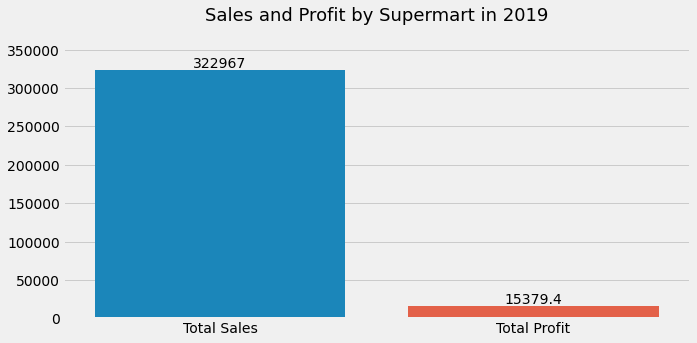

In [32]:
fig=plt.figure(figsize=(10,5))
ax=sns.barplot(data=Sales_Profit, x='Variable',y='Value',dodge=False)
ax.bar_label(ax.containers[0])
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0,380000)
plt.title('Sales and Profit by Supermart in 2019',fontsize=18)
plt.show()

In [ ]:
monthly_sales_profit=df.groupby('Month')['Total','gross income'].sum().reset_index().round(2)
monthly_sales_profit.columns=['Month','Sales','Profit']
monthly_sales_profit

In [ ]:
! pip install sort-dataframeby-monthorweek
! pip install sorted-months-weekdays

In [75]:
monthly_sales_profit=sd.Sort_Dataframeby_Month(df=monthly_sales_profit, monthcolumnname='Month')
monthly_sales_profit

,Month,Sales,Profit
0,January,116291.87,5537.71
1,February,97219.37,4629.49
2,March,109455.51,5212.17


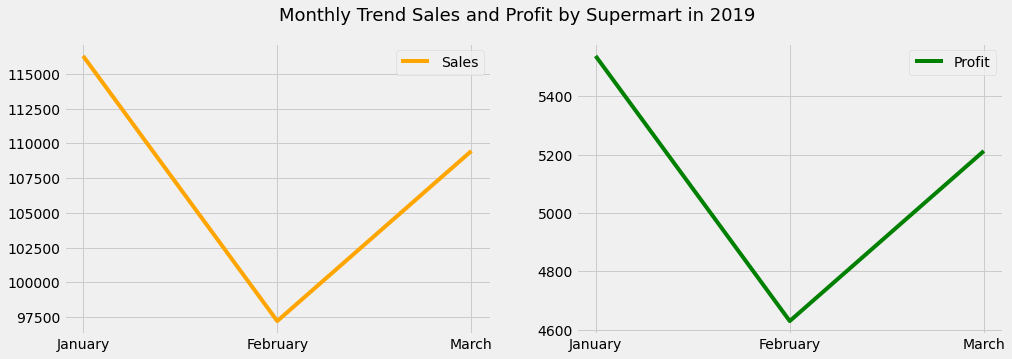

In [77]:
fig=plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax1=sns.lineplot(data=monthly_sales_profit, y='Sales', x='Month',label='Sales',color='orange')
plt.xlabel(None)
plt.ylabel(None)
plt.subplot(1,2,2)
ax2=sns.lineplot(data=monthly_sales_profit, y='Profit', x='Month',label='Profit',color='green')
plt.xlabel(None)
plt.ylabel(None)
plt.suptitle('Monthly Trend Sales and Profit by Supermart in 2019',fontsize=18)
plt.show()

Terjadi Penurunan yang sangat signifikan untuk penjualan dan Profit yang dihasilkan pada bulan February, namun di bulan selanjutnya terlihat trend yang baik dan mulai meningkat

In [78]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,cogs,gross margin percentage,gross income,Rating,Year,Month,Day,Day_name,Hour,Minute
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,522.83,4.761905,26.1415,9.1,2019,January,5,Saturday,13,8
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,76.40,4.761905,3.8200,9.6,2019,March,8,Friday,10,29
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,324.31,4.761905,16.2155,7.4,2019,March,3,Sunday,13,23
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,465.76,4.761905,23.2880,8.4,2019,January,27,Sunday,20,33
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,604.17,4.761905,30.2085,5.3,2019,February,8,Friday,10,37


In [146]:
city_sales_profit=df.groupby('City')['Total','gross income'].sum().reset_index().round(2).sort_values(by=['Total','gross income'],ascending=False)
city_sales_profit=city_sales_profit.melt(id_vars='City')
city_sales_profit['variable'].replace(['Total','gross income'],['Sales','Profit'],inplace=True)
city_sales_profit

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,City,variable,value
0,Naypyitaw,Sales,110568.71
1,Yangon,Sales,106200.37
2,Mandalay,Sales,106197.67
3,Naypyitaw,Profit,5265.18
4,Yangon,Profit,5057.16
5,Mandalay,Profit,5057.03


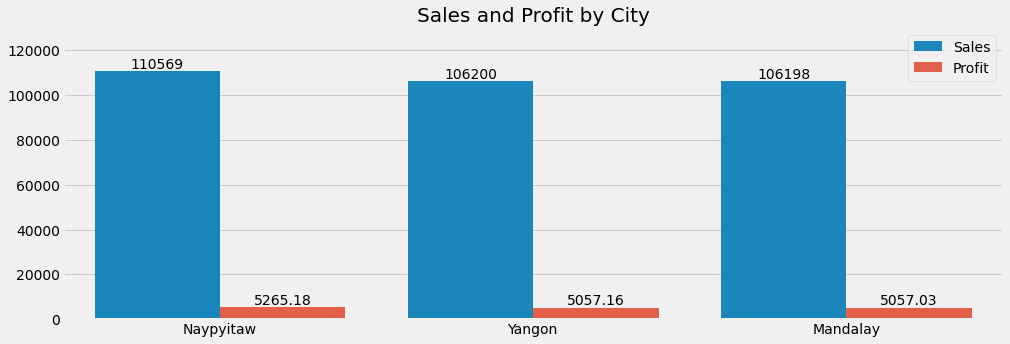

In [147]:
fig=plt.figure(figsize=(15,5))
ax=sns.barplot(data=city_sales_profit,x='City',y='value', hue='variable',dodge=True)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='')
plt.ylim(0,130000)
plt.title('Sales and Profit by City',fontsize=20)
plt.show()

Penjualan tertinggi berada di kota Naypyitaw begitu juga dengan profitnya. Dalam bar chart ini menunjukan semakin tinggi penjualanya akan berpengaruh terhadap profitnya

In [150]:
city_month=df.groupby(['City','Month'])['Total','gross income'].sum().reset_index().round(2).sort_values(by=['Total','gross income'],ascending=False)
city_month=sd.Sort_Dataframeby_Month(df=city_month,monthcolumnname='Month')
city_month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,City,Month,Total,gross income
0,Naypyitaw,January,40434.68,1925.46
1,Yangon,January,38681.13,1841.96
2,Mandalay,January,37176.06,1770.29
3,Mandalay,February,34424.27,1639.25
4,Naypyitaw,February,32934.98,1568.33
5,Yangon,February,29860.12,1421.91
6,Yangon,March,37659.12,1793.29
7,Naypyitaw,March,37199.04,1771.38
8,Mandalay,March,34597.34,1647.49


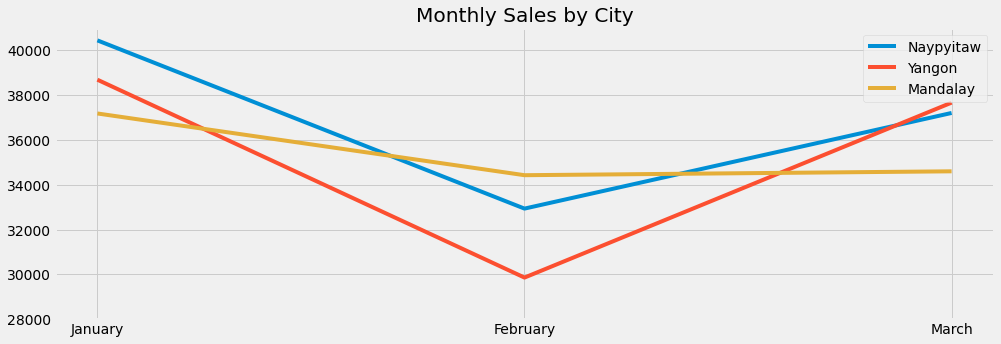

In [162]:
fig=plt.figure(figsize=(15,5))
ax=sns.lineplot(data=city_month, x='Month', y='Total', hue='City')
plt.ylim(28000,41000)
plt.legend(title='')
plt.title('Monthly Sales by City')
plt.xlabel(None)
plt.ylabel(None);

Secara keseluruhan kota Naypyitaw menjadi kota dengan penjualan dan profit tertinggi. Kalau dilihat trend penjualan berdasarkan bulan, kota Naypyitaw memperoleh penjualan tertinggi hanya di bulan January saja. Sementara kota Mandalay yang penjualan paling rendah di january menjadi penjualan tertinggi di bulan February. Dimana bulan february menjadi bulan yang paling rendah tingkat penjualannya dibandingkan bulan lainnya. Apa yang terjadi di bulan February???

In [163]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,cogs,gross margin percentage,gross income,Rating,Year,Month,Day,Day_name,Hour,Minute
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,522.83,4.761905,26.1415,9.1,2019,January,5,Saturday,13,8
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,76.40,4.761905,3.8200,9.6,2019,March,8,Friday,10,29
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,324.31,4.761905,16.2155,7.4,2019,March,3,Sunday,13,23
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,465.76,4.761905,23.2880,8.4,2019,January,27,Sunday,20,33
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,604.17,4.761905,30.2085,5.3,2019,February,8,Friday,10,37


In [170]:
next analis by product

4.761904761904762